Social interaction surveys analysis
===================================

The survey contain two questions:

- *In the last experiment block I interacted with close friends only.*
- *In the last experiment block I interacted with participants with them I have no social connection.*

Each question scored between 1 and 5 by the participants.

Each participant filled the survey 3 times, once after each experiment block.

The following blocks presents one-sided t-tests between the answers of the 2nd block of each group (group A vs. group B., control vs. interaction) as well as one-sided t-test between several differences between the blocks.

In [1]:
import collections

from scipy import stats
import matplotlib.pyplot as plt

from utils import utils
from utils import data as data_module

%matplotlib inline

Construct a dictionary where keys are tuples of (group, block) and values are participants answers (list).

In [2]:
csv_table = data_module.csv_table()
interaction_data = csv_table[['block{}{}'.format(i, j) for i in range(1, 9)
                                                       for j in range(1, 3)]]
a, b = [x.dropna(axis=1) for x in data_module.to_groups(interaction_data)]
d = collections.defaultdict(dict)
for q_num in [1, 2]:
    for i in [1, 2, 3]:
        d[q_num][('A', i)] = a['block{}{}'.format(i, q_num)].values
        d[q_num][('B', i)] = b['block{}{}'.format(i + 4, q_num)].values

## Question 1

*In the last experiment block I interacted with close friends only.*

First, I will show that there was no a-priori difference between the groups, using independent two-sided t-test.

In [3]:
q_num = 1
t_score, p_value = stats.ttest_ind(d[q_num][('A', 1)], d[q_num][('B', 1)])
print('t_score: {}\np_value: {}'.format(t_score, p_value))

t_score: 1.1893820223434128
p_value: 0.2475640994616678


A/1 -- mean: 3.18, stderr: 0.31
A/2 -- mean: 2.73, stderr: 0.29
A/3 -- mean: 2.55, stderr: 0.349
B/1 -- mean: 2.75, stderr: 0.172
B/2 -- mean: 2.75, stderr: 0.292
B/3 -- mean: 2.67, stderr: 0.379


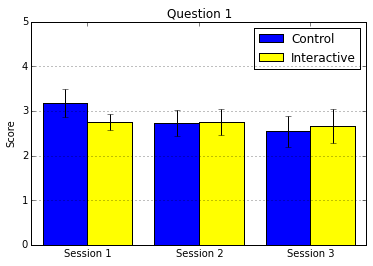

In [4]:
utils.two_groups_three_bars(d[q_num], title='Question {}'.format(q_num), ylabel='Score', ylim=[0, 5])

## Question 2

*In the last experiment block I interacted with participants with them I have no social connection.*

First, I will show that there was no a-priori difference between the groups, using independent two-sided t-test.

In [5]:
q_num = 2
t_score, p_value = stats.ttest_ind(d[q_num][('A', 1)], d[q_num][('B', 1)])
print('t_score: {}\np_value: {}'.format(t_score, p_value))

t_score: 0.18334997140046289
p_value: 0.8562821499665009


A/1 -- mean: 1.91, stderr: 0.239
A/2 -- mean: 2.64, stderr: 0.322
A/3 -- mean: 2.55, stderr: 0.372
B/1 -- mean: 1.83, stderr: 0.308
B/2 -- mean: 1.83, stderr: 0.259
B/3 -- mean: 1.83, stderr: 0.285


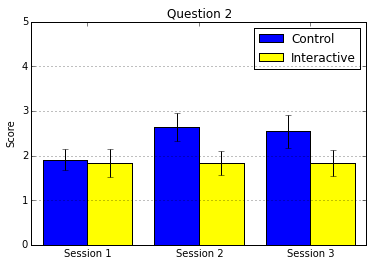

In [6]:
utils.two_groups_three_bars(d[q_num], title='Question {}'.format(q_num), ylabel='Score', ylim=[0, 5])

## The two plots on the same line, for paper

A/1 -- mean: 3.18, stderr: 0.31
A/2 -- mean: 2.73, stderr: 0.29
A/3 -- mean: 2.55, stderr: 0.349
B/1 -- mean: 2.75, stderr: 0.172
B/2 -- mean: 2.75, stderr: 0.292
B/3 -- mean: 2.67, stderr: 0.379
A/1 -- mean: 1.91, stderr: 0.239
A/2 -- mean: 2.64, stderr: 0.322
A/3 -- mean: 2.55, stderr: 0.372
B/1 -- mean: 1.83, stderr: 0.308
B/2 -- mean: 1.83, stderr: 0.259
B/3 -- mean: 1.83, stderr: 0.285


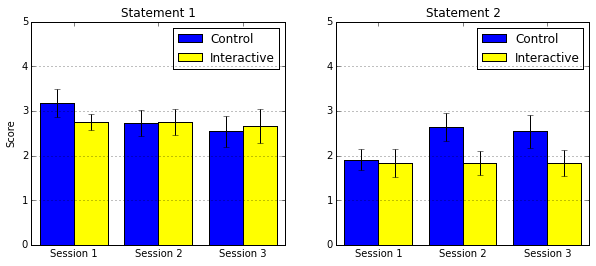

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
utils.two_groups_three_bars(d[1], title='Statement 1', ylabel='Score', ylim=[0, 5])
plt.subplot(1, 2, 2)
utils.two_groups_three_bars(d[2], title='Statement 2', ylim=[0, 5])

data_module.save_to_graphics('interaction_surveys-question_2')

## Export cooked data

In [8]:
data_module.save_to_cooked(d[1], 'interaction_survey_q1')
data_module.save_to_cooked(d[2], 'interaction_survey_q2')

# question 2 shows interesting results even for block 1 and 2 only
exclude_3 = {(group, block): values for (group, block), values in d[2].items() if block != 3}
data_module.save_to_cooked(exclude_3, 'interaction_survey_q2_session_1_vs_2')